# Part I - (February 2019 fordgobike data exploration)
## by (EKPOT GODSWILL TOM)

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling

In [465]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# LOADING DATASET

In [466]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [467]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

# Quality issues
1. Presence of null values
2. The start_time and end_time are both object datatypes and are supposed to be datetime variables


# Tidiness issues
1. The start_time and end_time are both object datatypes and are supposed to be datetime variables
2. There are columns for longitude and latitude. These values on their own are not variables as they cant be measured against each other or a standard and cannot be calculated on their own. Therefore i plan to extract the longitude and latitude columns of the start and end points to another dataset to calculate the distance between the pointsfrom them 
3. Start and end time columns contain too many variable including year,month, date, hour etc. therefore we will seperate options in this column and analyze seperately Also, we will use member birth year and year from the time stamp to calculate age of the rider.
4. Duration in seconds will be changed to minutes and probably hours

In [469]:
dfcop=df.copy()

In [470]:
df=df.dropna(axis=0)

# To drop the longitude and latitude columns so they dont clog our data

In [471]:
dcols=df.iloc[:,[5,6,9,10]]
dcols.head()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,37.789625,-122.400811,37.794231,-122.402923
2,37.769305,-122.426826,37.786375,-122.404904
3,37.774836,-122.446546,37.773311,-122.444293
4,37.804562,-122.271738,37.792714,-122.248780
5,37.770407,-122.391198,37.798014,-122.405950


In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [473]:
df=df.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis=1)

In [474]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


# Info to be gotten from the data
1. get the age range of people who use this service the most.
2. Get the average distance traveled by the riders monthly or yearly
3. get average duration riden by people who share and people who dont share
4. To check if sharing has any influence on duration and distance
5. To find relationship between gender and member type
6. The most used start point to know location with more time


### To get columns of the members ages, we'll subtract their birth year from the current year

##### Converting start and end time columns to datetime datatype

In [475]:
df[["start_time", "end_time"]] = df[["start_time", "end_time"]].apply(pd.to_datetime)

In [478]:
df['Dates'] = pd. to_datetime(df['start_time']). dt. date

### seperating time and dates 

In [551]:
df['year'] = pd. to_datetime(df['start_time']). dt. year

In [479]:
df['Time'] = pd. to_datetime(df['start_time']). dt. time

In [552]:
df['member_age']=df['year']-df['member_birth_year']

In [553]:
df['member_age'].head()

0    35.0
2    47.0
3    30.0
4    45.0
5    60.0
Name: member_age, dtype: float64

#### To get distance, we aim to turn the start and end longitudes and latitudes to coordinates then calculate the distance between them using a euclidean distance function

In [482]:
#using haversine library
import haversine as hs

In [483]:
dcols['start_coordinate'] = (dcols['start_station_latitude'].astype(str) + ',' + dcols['start_station_longitude']. \
     astype(str)).str.split(',').apply(lambda coord: [float(c) for c in coord])

dcols['end_coordinate'] = (dcols['end_station_latitude'].astype(str) + ',' + dcols['end_station_longitude']. \
     astype(str)).str.split(',').apply(lambda coord: [float(c) for c in coord])


## To test the function

In [484]:
hs.haversine(dcols['start_coordinate'][0],dcols['end_coordinate'][0])

0.544709255692834

In [485]:
dcols['start-end'] = list(zip(dfb.start_coordinate, dfb.end_coordinate))
dcols.head()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,start_coordinate,end_coordinate,start-end
0,37.789625,-122.400811,37.794231,-122.402923,"[37.7896254, -122.400811]","[37.794231, -122.402923]","([37.7896254, -122.400811], [37.794231, -122.4..."
2,37.769305,-122.426826,37.786375,-122.404904,"[37.7693053, -122.4268256]","[37.78637526861584, -122.40490436553954]","([37.7693053, -122.4268256], [37.7863752686158..."
3,37.774836,-122.446546,37.773311,-122.444293,"[37.77483629413345, -122.44654566049576]","[37.77331087889723, -122.44429260492323]","([37.77483629413345, -122.44654566049576], [37..."
4,37.804562,-122.271738,37.792714,-122.248780,"[37.8045623549303, -122.27173805236816]","[37.7927143, -122.2487796]","([37.8045623549303, -122.27173805236816], [37...."
5,37.770407,-122.391198,37.798014,-122.405950,"[37.7704074, -122.3911984]","[37.79801364395978, -122.40595042705534]","([37.7704074, -122.3911984], [37.7980136439597..."


In [486]:
dcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_station_latitude   174952 non-null  float64
 1   start_station_longitude  174952 non-null  float64
 2   end_station_latitude     174952 non-null  float64
 3   end_station_longitude    174952 non-null  float64
 4   start_coordinate         174952 non-null  object 
 5   end_coordinate           174952 non-null  object 
 6   start-end                174952 non-null  object 
dtypes: float64(4), object(3)
memory usage: 14.7+ MB


In [487]:
dcols['start_coordinate'].values

array([list([37.7896254, -122.400811]), list([37.7693053, -122.4268256]),
       list([37.77483629413345, -122.44654566049576]), ...,
       list([37.3319323, -121.9048882]), list([37.8113514, -122.2734217]),
       list([37.7896767, -122.3904285])], dtype=object)

In [491]:
'''
dfb['dist']=[]
for i1,i2 in zip(dcols['start_coordinate'].values, dcols['end_coordinate'].values):
    print(i1)
    break
    i=0
    try:
        print()
        hs.haversine(i1, i2)
        i+=1
    except Exception as e:
        print(e)
        '''

"\ndfb['dist']=[]\nfor i1,i2 in zip(dcols['start_coordinate'].values, dcols['end_coordinate'].values):\n    print(i1)\n    break\n    i=0\n    try:\n        print()\n        hs.haversine(i1, i2)\n        i+=1\n    except Exception as e:\n        print(e)\n        "

In [492]:
'''
dfb['dist']=[]
for i1,i2 in zip(dcols.start_coordinate,dcols.end_coordinate):
    print(i1)
    break
    i=0
    try:
        print()
        hs.haversine(i1,i2)
        i+=1
    except Exception as e:
        print(e)
        '''

"\ndfb['dist']=[]\nfor i1,i2 in zip(dcols.start_coordinate,dcols.end_coordinate):\n    print(i1)\n    break\n    i=0\n    try:\n        print()\n        hs.haversine(i1,i2)\n        i+=1\n    except Exception as e:\n        print(e)\n        "

In [493]:
first_point=dfc['start_coordinate']
second_point=dfc['end_coordinate']

In [494]:
'''
for sp in first_point:
    for ep in second_point:
    dist=hs.haversine(sp,ep)
'''
#This is a code to find the distance between the 2 points, however, i do not have the memory it requires to calculate and 
#store the results

'\nfor sp in first_point:\n    for ep in second_point:\n    dist=hs.haversine(sp,ep)\n'

In [548]:
'''
dfc['distance'] = (first_point.astype(str) + ',' + second_point. \
     astype(str)).str.split(',').apply(lambda coord: [hs.haversine(c,s) for c,s in coord])
'''

"\ndfc['distance'] = (first_point.astype(str) + ',' + second_point.      astype(str)).str.split(',').apply(lambda coord: [hs.haversine(c,s) for c,s in coord])\n"

In [549]:
'''
for slat_p in df['start_station_latitude']:
    for slong_p in df['start_station_longitude']:
        km=harvesine(lat_p, long_p)
        distance. append(km)
        '''

"\nfor slat_p in df['start_station_latitude']:\n    for slong_p in df['start_station_longitude']:\n        km=harvesine(lat_p, long_p)\n        distance. append(km)\n        "

In [495]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,Dates,Time,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,2019,2019-02-28,17:32:10.145000,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2019,2019-02-28,12:13:13.218000,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,2019,2019-02-28,17:54:26.010000,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2019,2019-02-28,23:54:18.549000,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,2019,2019-02-28,23:49:58.632000,60.0


In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
 12  year            

### To calculate time in minutes

In [497]:
df['duration_mins']=df.iloc[:,0]/60
df.head()
df=df.drop('duration_sec',axis=1)

In [498]:
df.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,Dates,Time,member_age,duration_mins
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,2019,2019-02-28,17:32:10.145000,35.0,869.750000
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2019,2019-02-28,12:13:13.218000,47.0,1030.900000
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,2019,2019-02-28,17:54:26.010000,30.0,608.166667
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2019,2019-02-28,23:54:18.549000,45.0,26.416667
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,2019,2019-02-28,23:49:58.632000,60.0,29.883333


In [499]:
df.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'year',
       'Dates', 'Time', 'member_age', 'duration_mins'],
      dtype='object')

### To extract the hour of rides from the start_time column

In [500]:
df['datehour'] = df['start_time'].dt.hour

## Univariate Exploration


#### Explore member age

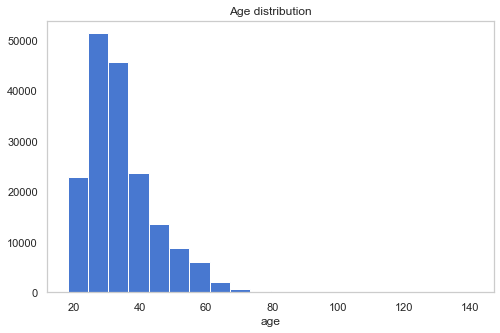

In [505]:
#ax=plt.axes
#sns.scatterplot('member_age',data=dfc)
binsize = 500
bins = np.arange(0, df['member_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
ax=plt.hist(data = df, x = 'member_age', bins =20)
plt.grid(b=None)
plt.xlabel('age')
plt.title('Age distribution')
plt.show()

### U1: we can observe from the histogram that prople within the ages of 20 and 40 ride bikes the most.

## Explore member gender

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


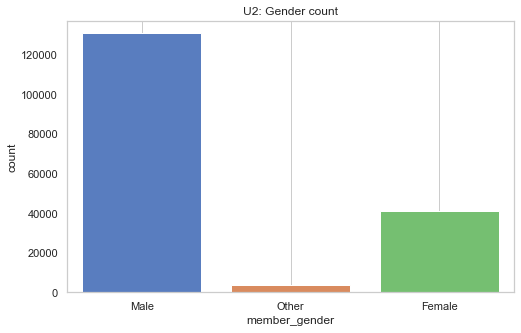

In [523]:
plt.figure(figsize=(8,5))
sns.countplot('member_gender',data=df).set_title('U2: Gender count')
plt.grid(None)

It is obvious from the visualizations that we have a more significant amount of male members than female members

## Exploring the duration of the rides

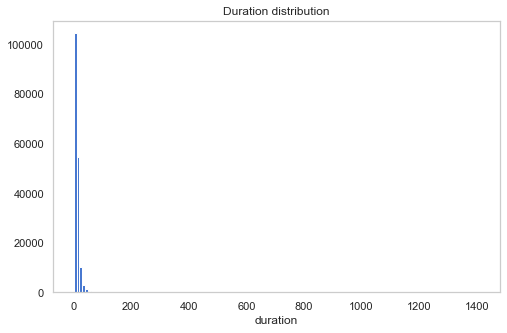

In [560]:
binsize = 10
bins = np.arange(0, df['duration_mins'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_mins', bins =bins,range=[10,200])
plt.grid(b=None)
plt.xlabel('duration')
plt.title('Duration distribution')
plt.show()

#### from this we can conclude that mst bike rides take 30 minutes- 1 hour

## exploring bike share status

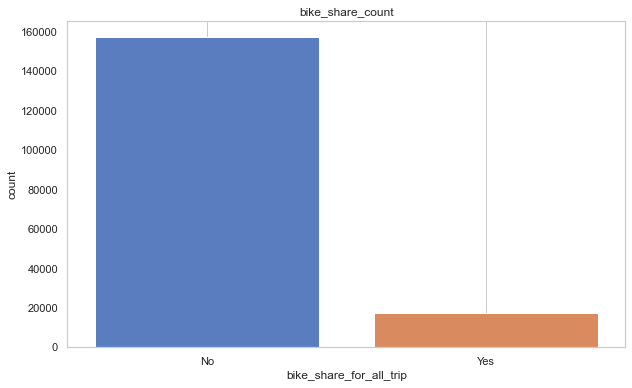

In [512]:
plt.figure(figsize=(10,6))
sns.countplot(x='bike_share_for_all_trip',data=df).set_title('bike_share_count')
plt.grid(b=None)

### We have a low bike share rate and we will explore that in bivariate stage

## Exploring The time of rides

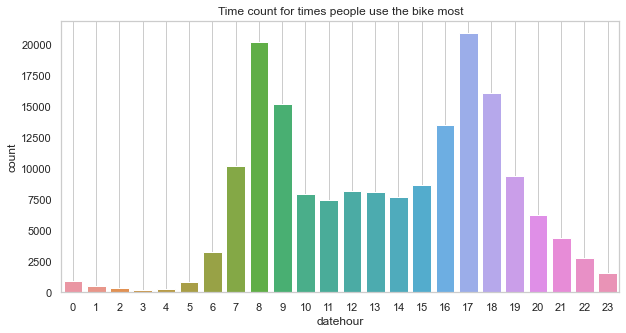

In [516]:
plt.figure(figsize = [10, 5])
sns.countplot(x='datehour',data=df).set_title('Time count for times people use the bike most')
plt.grid(b=None)

### From this time count plot, we can say most people ridw between 7am & 10am and between 4pm and 7pm using the 24hr formmat

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


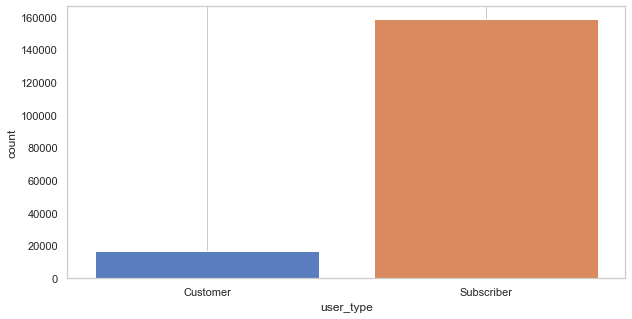

In [519]:
plt.figure(figsize = [10, 5])
sns.countplot('user_type',data=df)
plt.grid(None)

### This shows that There are significantly more subscribbers than customers in a ratio of about 1:7 ratio

In [426]:
stations=df.iloc[df.groupby('start_station_name').start_station_name.transform('size').argsort(kind='mergesort')]

In [458]:
s_stations=df.groupby('start_station_name').count().sort_values(by='start_station_name',ascending=False).head(10)
s_stations

,start_time,end_time,start_station_id,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,Dates,Time,member_age,duration_mins,datehour
start_station_name,,,,,,,,,,,,,,,,
Yerba Buena Center for the Arts (Howard St at 3rd St),795,795,795,795,795,795,795,795,795,795,795,795,795,795,795,795
Woolsey St at Sacramento St,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345
Willow St at Vine St,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Williams Ave at Apollo St,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Williams Ave at 3rd St,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
William St at 10th St,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
West St at University Ave,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149
West St at 40th St,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173
West Oakland BART Station,811,811,811,811,811,811,811,811,811,811,811,811,811,811,811,811


### sorting the df by station count to obtain the most used station

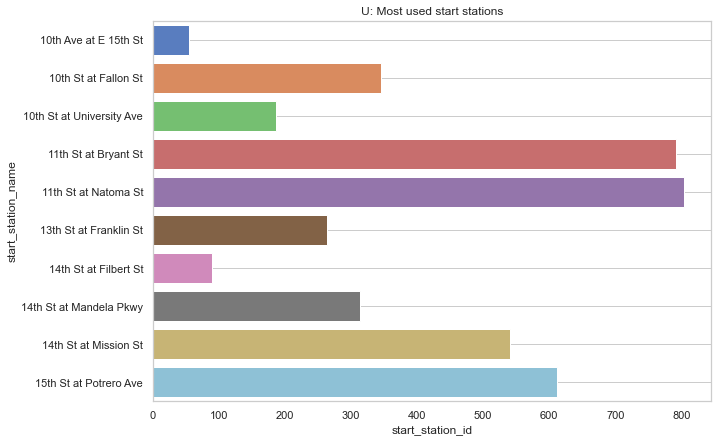

In [522]:
plt.figure(figsize=(10,7))
sns.barplot(y=s_stations.index,x='start_station_id',data=s_stations).set_title('U: Most used start stations')
plt.grid(None)

##### Above is a list of the 10 most used bike start stations. We can conclude that the areas where these stations are located are the most populated areas.

## Summarry
1. we can observe from U1 that prople within the ages of 20 and 40 ride bikes the most.
2. It is obvious from the visualizations that we have a more significant amount of male members than female members

###  variable(s) of interest. 

> Had to calculate some new values to get a clearer picture like member age, duration mins, dates etc
Time variable is stored as an object and need to be change to datatieme
The year column is not necessary since all the rides are form a single year


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [524]:
numeric=['member_age','duration_mins','member_birth_year','datehour']

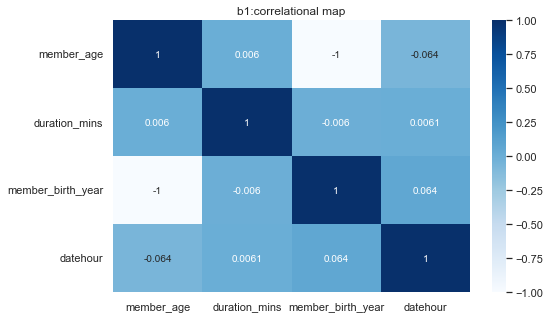

In [525]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric].corr(), annot = True,
           cmap = 'Blues', center = 0).set_title('b1:correlational map')
plt.show()

#### No heavy correlation observed here

df.shape= (174952, 17)
df_samp.shape= (500, 17)


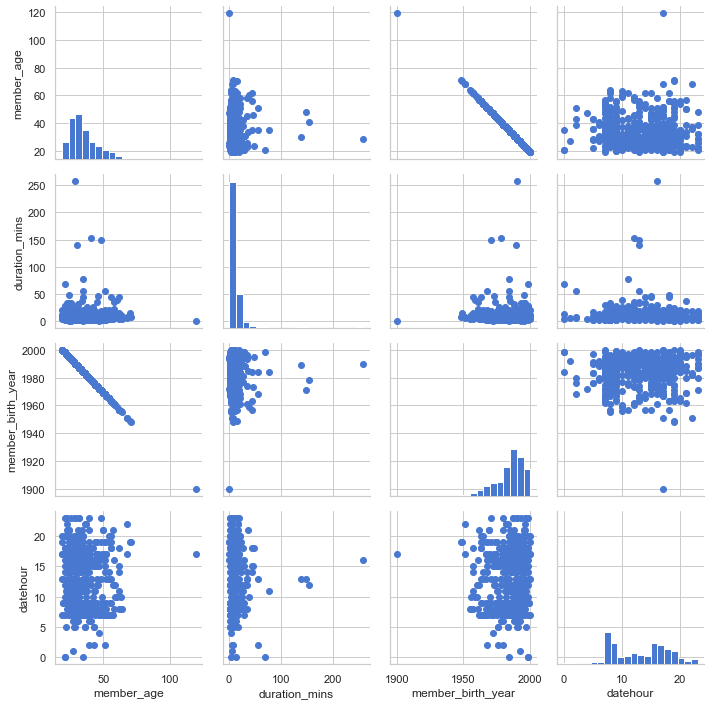

In [526]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("df.shape=",df.shape)
df_samp = df.sample(n=500, replace = False)
print("df_samp.shape=",df_samp.shape)

g = sns.PairGrid(data = df_samp, vars = numeric)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

#### From the above we can see that people below 60 ride bikes most between 7am and 8pm
#### It also shows that people ride bikes for longer periods betwwen 7am and 8pm

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  float64       
 3   start_station_name       174952 non-null  object        
 4   end_station_id           174952 non-null  float64       
 5   end_station_name         174952 non-null  object        
 6   bike_id                  174952 non-null  int64         
 7   user_type                174952 non-null  object        
 8   member_birth_year        174952 non-null  float64       
 9   member_gender            174952 non-null  object        
 10  bike_share_for_all_trip  174952 non-null  object        
 11  year                     174952 non-null  int64         
 12  Dates           

## Exploring ride time across genders

Text(0.5, 1.0, 'B2:gender ride duration')

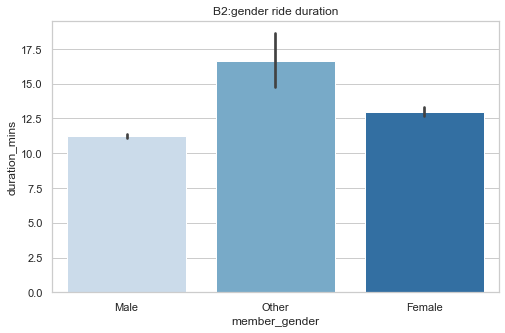

In [528]:
plt.figure(figsize = [8, 5])
sns.barplot(x='member_gender',y='duration_mins',data=df,palette='Blues').set_title('B2:gender ride duration')

#### we can say from this that the men ride bikes for the least time even tho they have the highest population of bike riders

## Exploring user type ride time

Text(0.5, 1.0, 'B3:user type ride duration')

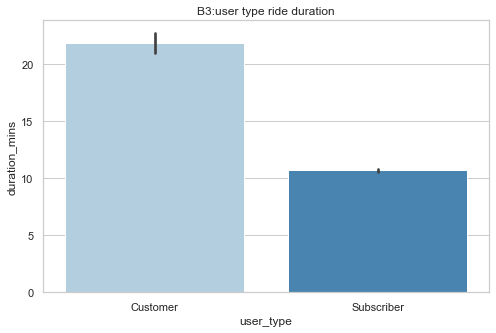

In [529]:
plt.figure(figsize = [8, 5])
sns.barplot(x='user_type',y='duration_mins',data=df,palette='Blues').set_title('B3:user type ride duration')

#### This show that the customers ride for longer time and by extension distances than subscribers even though we have more subscribers

## Exploring sharing vs duration

Text(0.5, 1.0, 'B4:sharing vs duration')

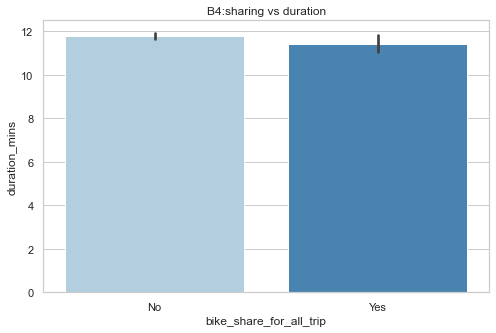

In [530]:
plt.figure(figsize = [8, 5])
sns.barplot(x='bike_share_for_all_trip',y='duration_mins',data=df,palette='Blues').set_title('B4:sharing vs duration')

#### This chart shows little or no difference between the duratiion of shared and non shared trips 

## To demonstrate relationship between member age and datehour

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'B5: member age for ride time')

<Figure size 720x360 with 0 Axes>

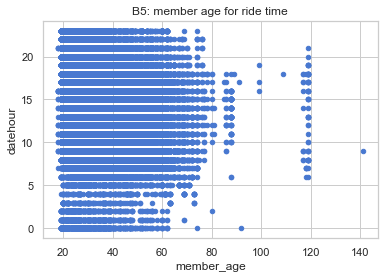

In [531]:
plt.figure(figsize = [10, 5])
df.plot.scatter(y='datehour',x='member_age').set_title('B5: member age for ride time')

##### This particular chart highlights the presence of outliers in the age column as it indicates that there are people above 100 years who still ride these bikes which is impossible more or less
It also indicates that people above 60 prefer to ride bikes from 10am upwards.

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  float64       
 3   start_station_name       174952 non-null  object        
 4   end_station_id           174952 non-null  float64       
 5   end_station_name         174952 non-null  object        
 6   bike_id                  174952 non-null  int64         
 7   user_type                174952 non-null  object        
 8   member_birth_year        174952 non-null  float64       
 9   member_gender            174952 non-null  object        
 10  bike_share_for_all_trip  174952 non-null  object        
 11  year                     174952 non-null  int64         
 12  Dates           

In [550]:
'''
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'start_station_latitude', y = 'start_station_longitude', alpha = 1/10)
plt.xlim([0, 3.5])
plt.xlabel('Carat')
#plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')
plt.show()
'''

"\nplt.figure(figsize = [8, 6])\nplt.scatter(data = df, x = 'start_station_latitude', y = 'start_station_longitude', alpha = 1/10)\nplt.xlim([0, 3.5])\nplt.xlabel('Carat')\n#plt.yscale('log')\nplt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])\nplt.ylabel('Price ($)')\nplt.show()\n"

### Relationships observed in this part of the investigation.

1. From the pairgrid we can see that people below 60 ride bikes most between 7am and 8pm It also shows that people ride bikes for longer periods betwwen 7am and 8pm
2. A low level of correlation can be noticed from the correlational map and the pairgrid.
3. we can say from chart B2 that the men ride bikes for the least time even tho they have the highest population of bike riders
4. B3 shows that the customers ride for longer time and by extension distances than subscribers even though we have more subscribers
5. B4 shows little or no difference between the duratiion of shared and non shared trips
6. B5  highlights the presence of outliers in the age column as it indicates that there are people above 100 years who still ride these bikes which is impossible more or less It also indicates that people above 60 prefer to ride bikes from 10am upwards.


## Multivariate Exploration


In [533]:
'''
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="member_gender", y="duration_mins", hue="user_type")
ax.set(ylabel="")
'''

'\nsns.set_theme(style="whitegrid", palette="muted")\n\n# Draw a categorical scatterplot to show each observation\nax = sns.swarmplot(data=df, x="member_gender", y="duration_mins", hue="user_type")\nax.set(ylabel="")\n'

<Figure size 1080x720 with 0 Axes>

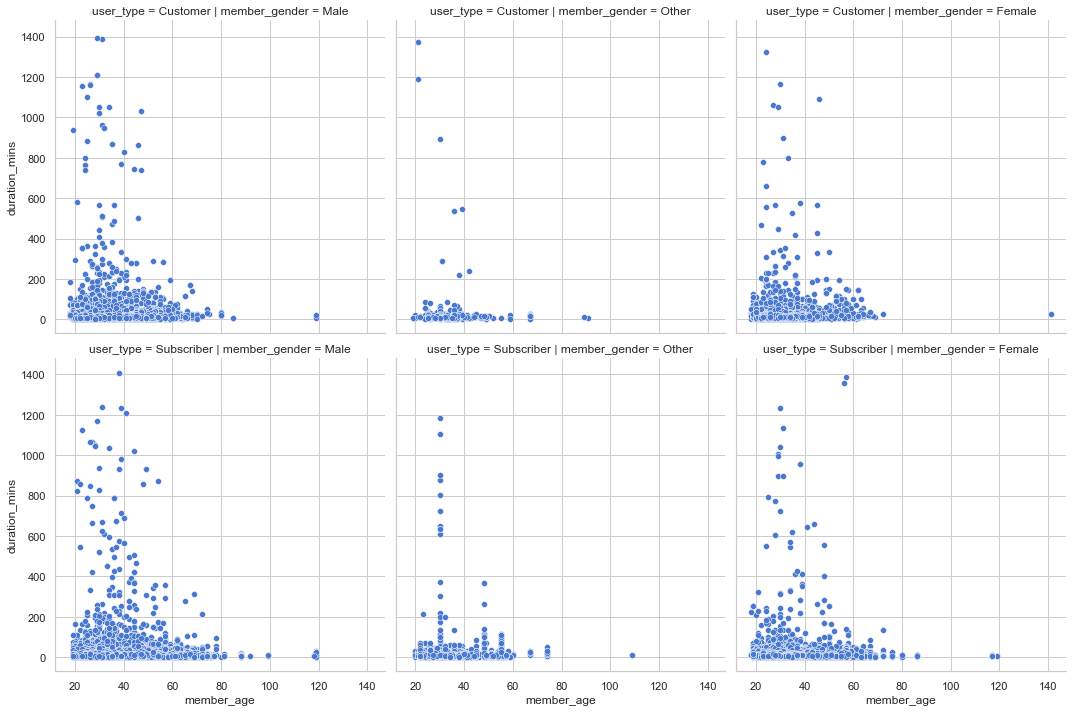

In [540]:
plt.figure(figsize=(15,10))
g = sns.FacetGrid(df, col="member_gender",  row="user_type",height=5)
g.map(sns.scatterplot, "member_age", "duration_mins")

#### From this plot, we can observe

1. The "other" gender has the least values but with higher durations so they could be considered at outliers
2. There are more male riders than female riders
3. The duration reducs with age therefore, the older the rider is, the less time he/she is going to ride for
4. There is little or no difference between theh the distribution of customers and subscribers

In [536]:
df.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'year',
       'Dates', 'Time', 'member_age', 'duration_mins', 'datehour'],
      dtype='object')

Text(0.5, 1.0, '')

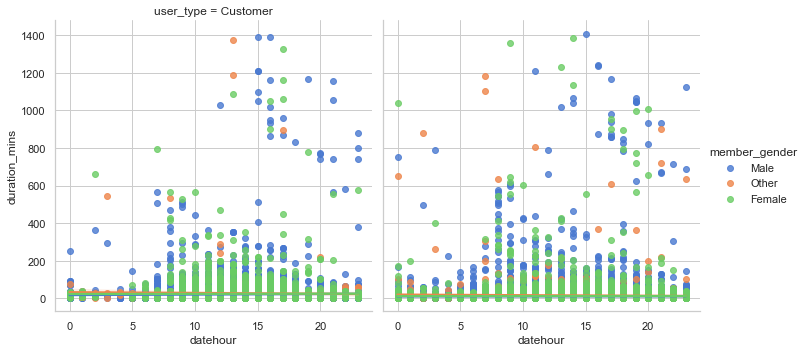

In [547]:
sns.lmplot(data=df, x="datehour", y="duration_mins", hue="member_gender",
           col="user_type")

### This plot indicates that women ride for longer periods than men wether customer or subscriber. We also note that there is an even distribution of genders between the 2 user types subscribers and customers.

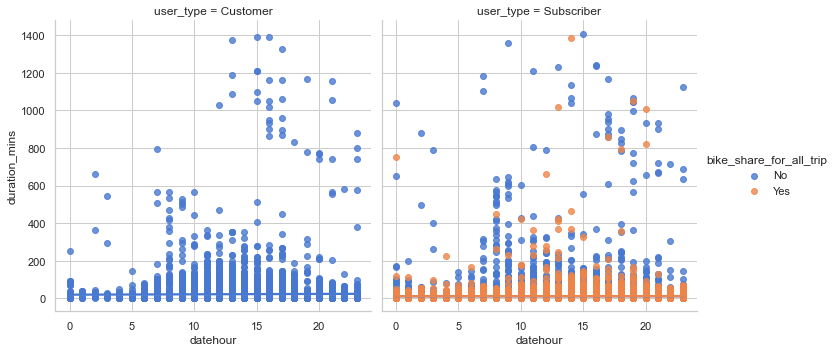

In [554]:
sns.lmplot(data=df, x="datehour", y="duration_mins", hue="bike_share_for_all_trip",
           col="user_type")

### we can see here that little or no customers using the sharing option however, the subscribers use it the most over short time rides.

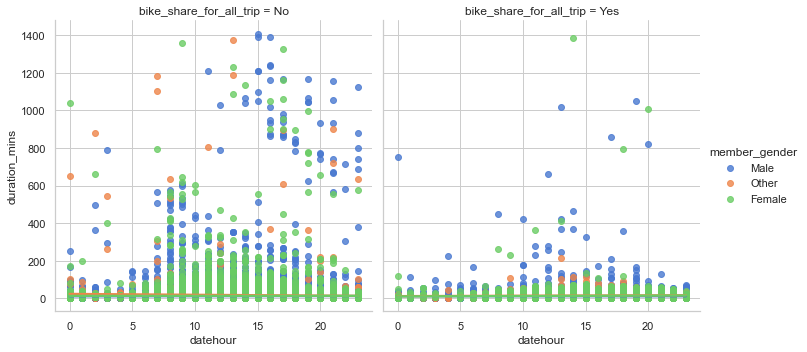

In [556]:
sns.lmplot(data=df, x="datehour", y="duration_mins", col="bike_share_for_all_trip",
           hue="member_gender")

#### This shows that thereis a fairly equal amount of genders who either share or do not share the bike rides.

In [566]:
df.to_csv(r'C:\Users\user\Desktop\UDACITY PROJECT 3\my_data.csv', index=False)

## Relationships observed 
1. The "other" gender has the least values but with higher durations so they could be considered at outliers
2. There are more male riders than female rider
3. The duration reducs with age therefore, the older the rider is, the less time he/she is going to ride for
4. There is little or no difference between theh the distribution of customers and subscribers


## Interesting or surprising interactions between features?
The fact That women rode for longer periods than men was a little shocking to me

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.
Having to deal with this dataset has been surprisingly stressful but also interesting
I was able to import and clean the data, created a copy of the datset store as dfcop before cleaning and visualizations
I started by perdorming univariate plots like historams and countplots.
I then proceed to bivariate visualizations starting off with heatmaps, pairplot,barplots,etc



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

